# 비지도학습 군집분석: 정답지가 없는 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 군집분석 (계층적 군집, 비계층적 군집)
* 계층적 군집
    * 비지도학습
    * 데이터가 적을 때 사용
    * 거리 계산 지표: 유클리드, 맨하탄, 코사인 유사도
* 계층적 군집 5가지 
    * 단일 연결법 (single linage), 최단연결법: 군집과 군집 사이에서 가장 가까운 데이터를 기준으로 묶음
    * 완전연결법 (complite linage), 최장연결법: 군집과 군집 사이에서 가장 먼 데이터를 기준으로 묶음
    * 평균연결법 (average linkage): 군집과 군집 사이의 모든 데이터의 평균 데이터로 계산 (이상치에 덜 민감)
    * 중심연결법 (centroid linkage): 군집과 중심점 사이의 거리를 거리로 측정한 방법, 계산이 빠름
    * 와드연결법(ward linkage): 군집내 오차가 최소가 되는 데이터로 계산, 군집내 분산이 최소, 조밀한 군집
* 계층적 군집으로 시각화는 덴드로그램으로 한다.

In [6]:
import scipy.cluster.hierarchy as shc

In [7]:
data = pd.get_dummies(data, drop_first=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [8]:
data2 = data.copy()

In [9]:
data = data.drop('CustomerID', axis=1)

In [10]:
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


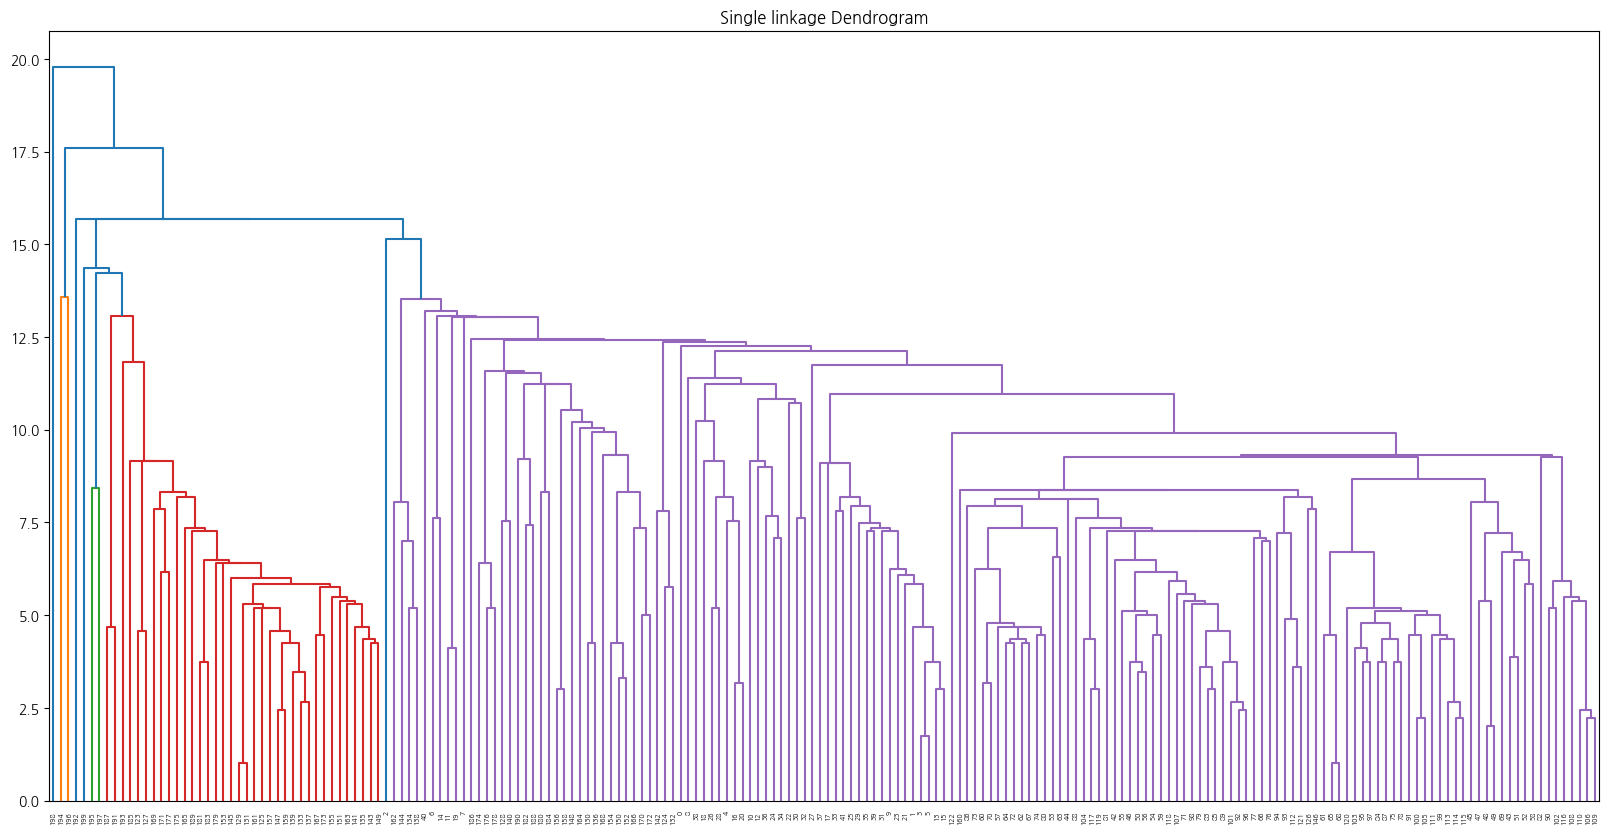

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Single linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='single'))
plt.show()

* 완전연결법 / 최장연결법

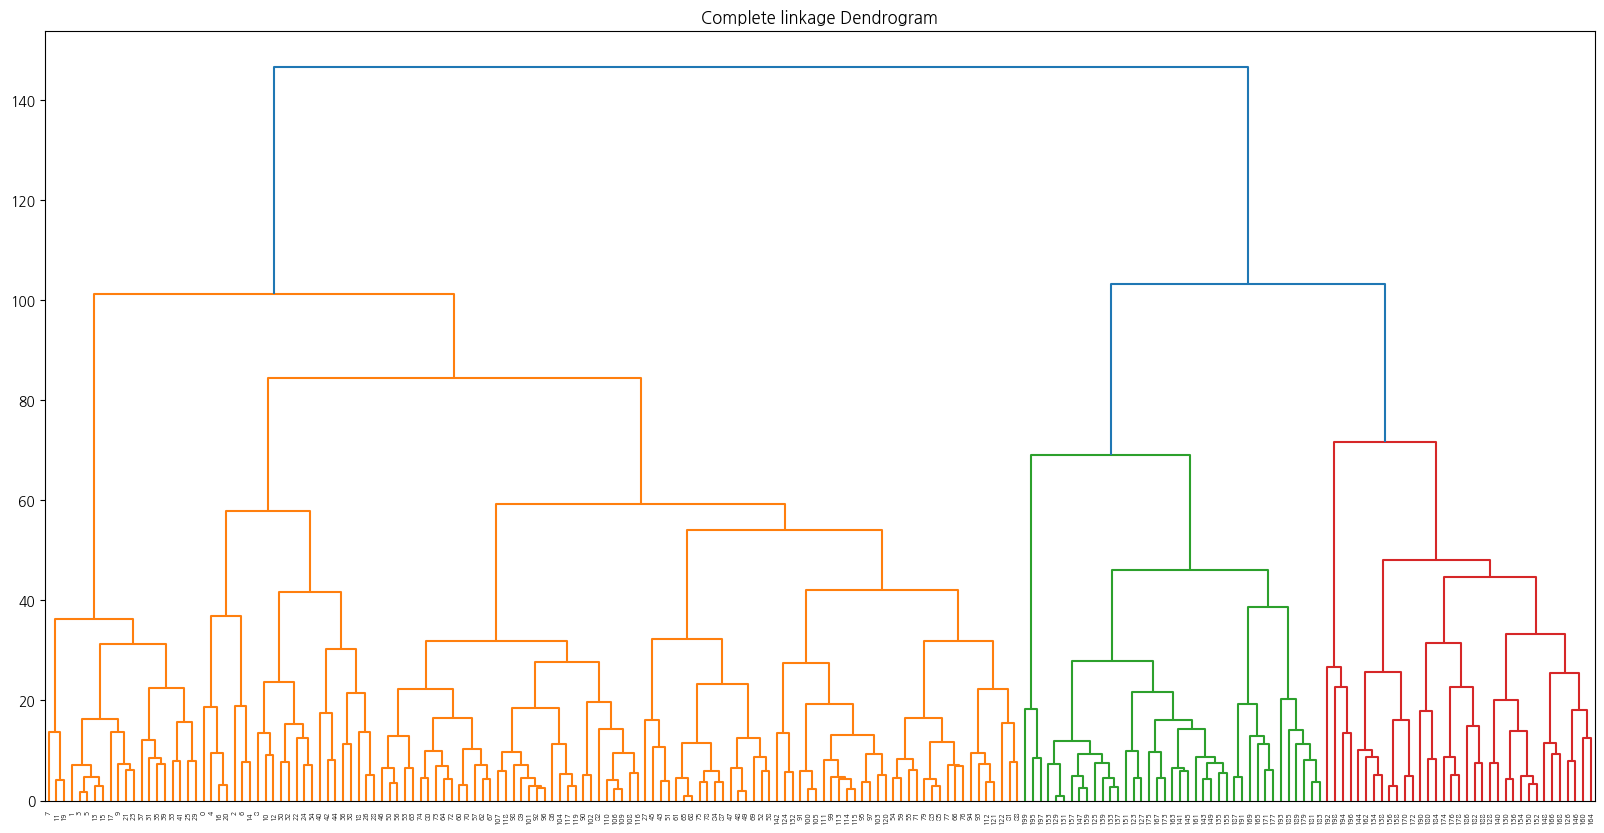

In [12]:
plt.figure(figsize=(20, 10))
plt.title('Complete linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='complete'))
plt.show()

평균연결법

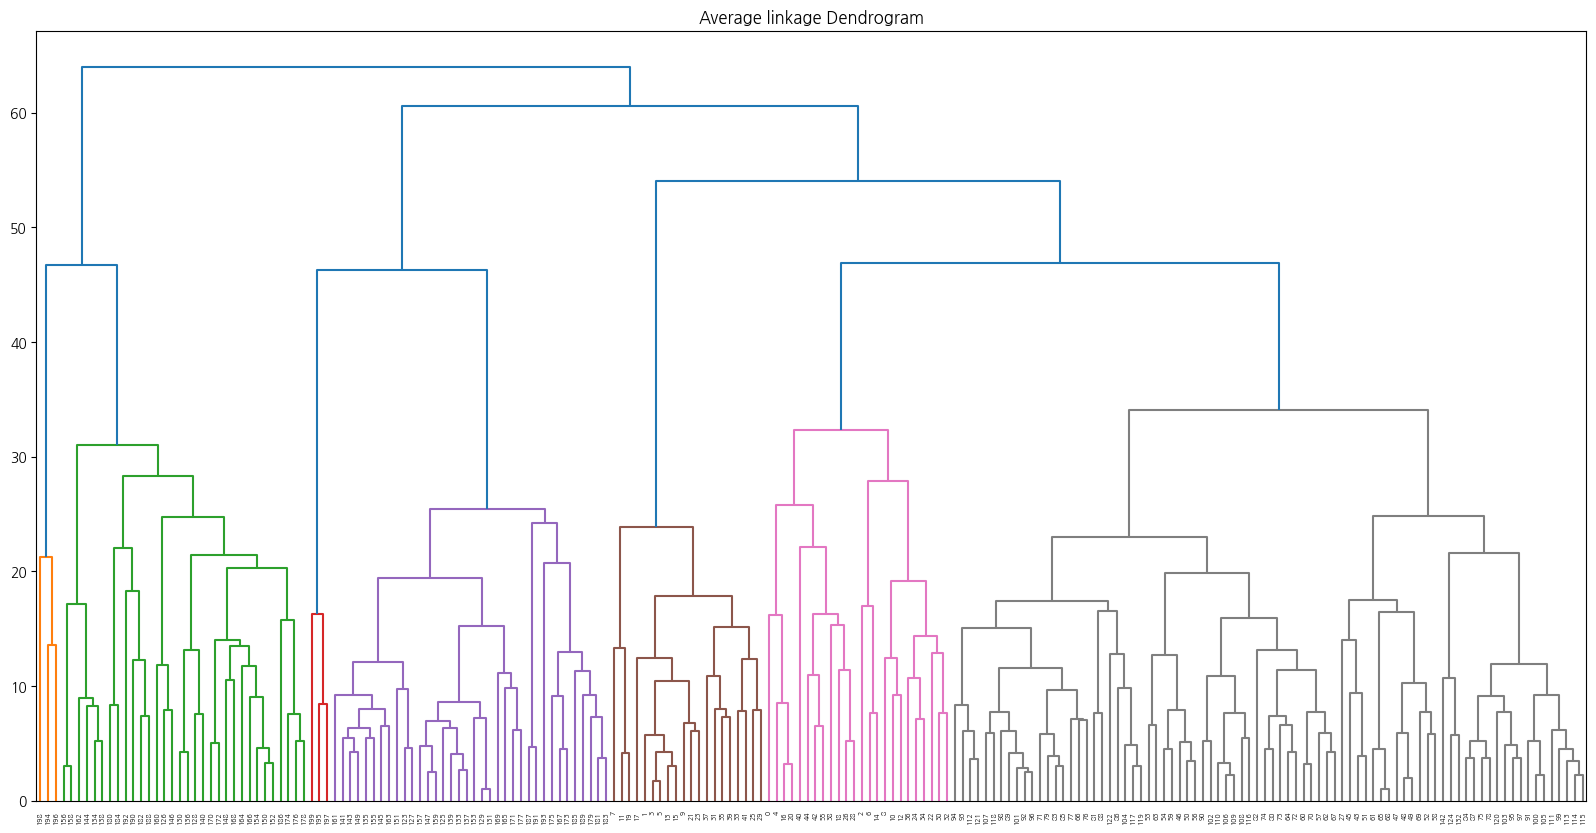

In [13]:
plt.figure(figsize=(20, 10))
plt.title('Average linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='average'))
plt.show()

중심연결법(centroid)

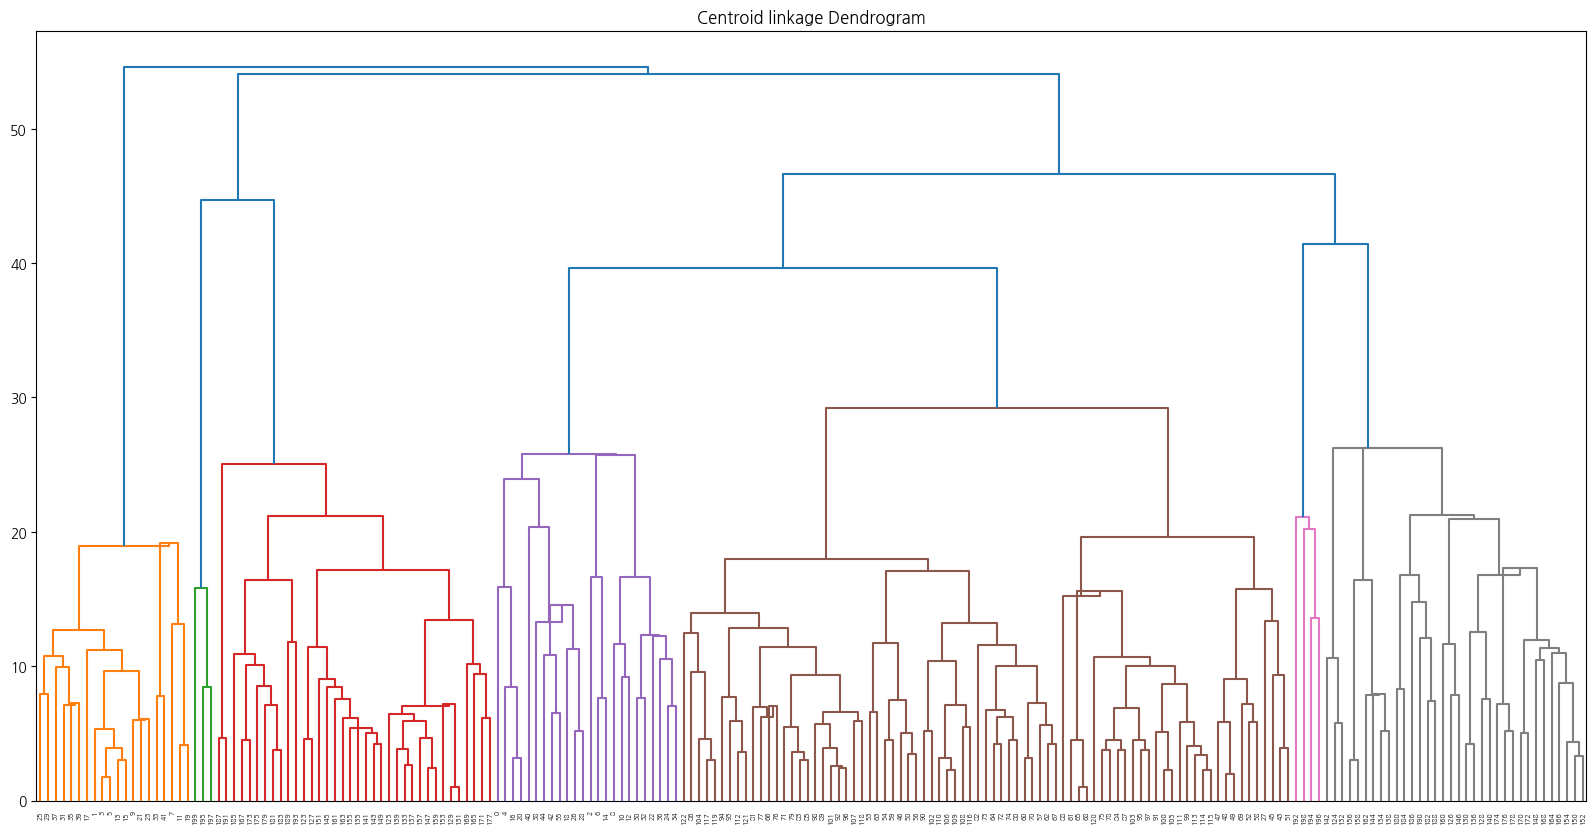

In [16]:
plt.figure(figsize=(20, 10))
plt.title('Centroid linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='centroid'))
plt.show()

와드 연결법

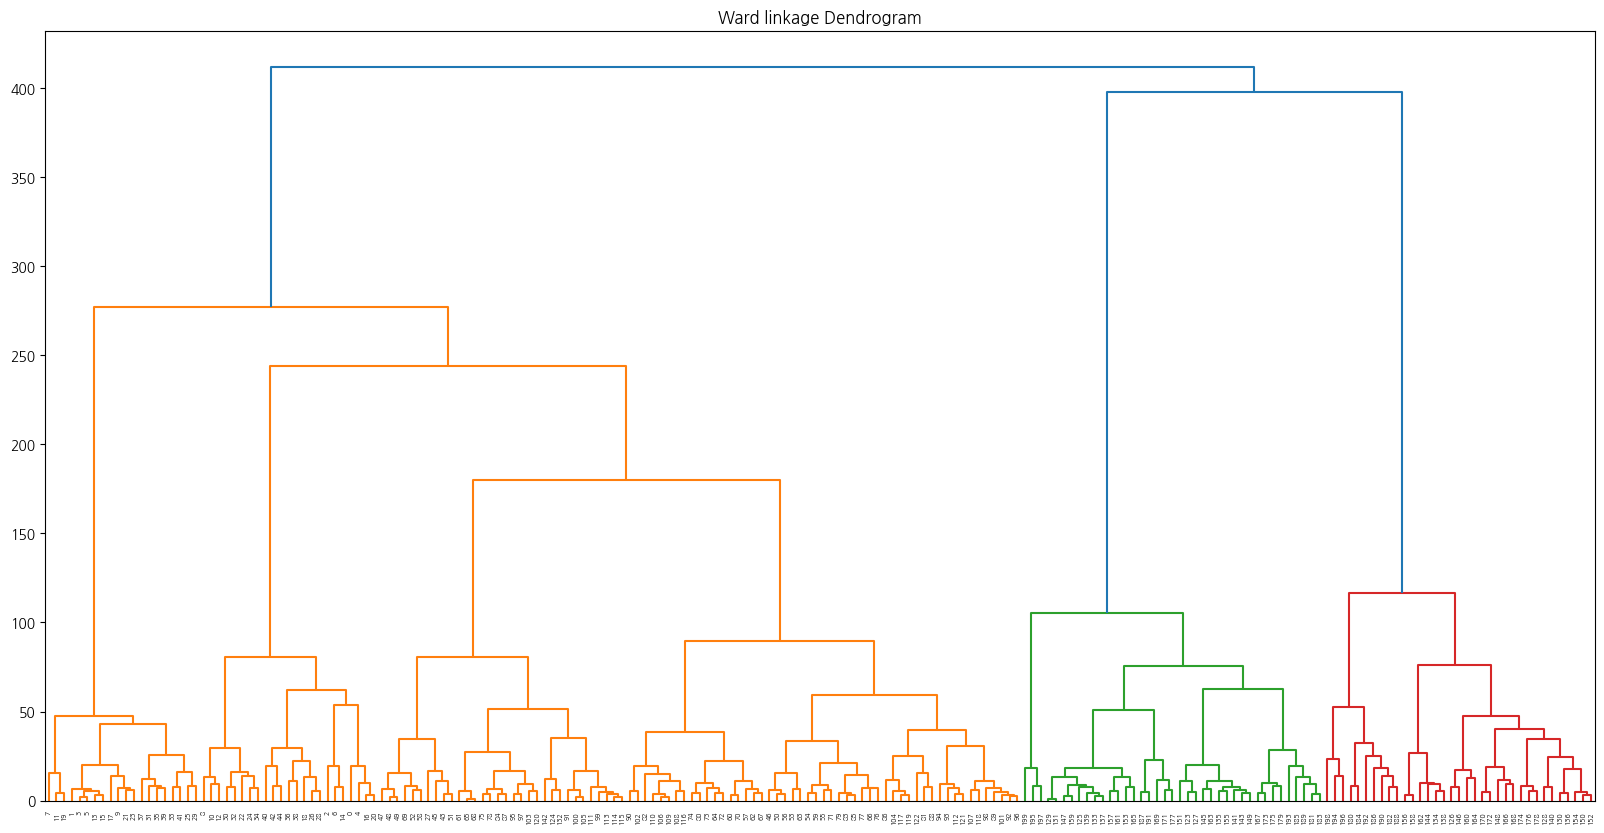

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Ward linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
result = single.fit_predict(data)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0])

In [23]:
data2['single'] = result
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single
0,1,19,15,39,True,0
1,2,21,15,81,True,0
2,3,20,16,6,False,0
3,4,23,16,77,False,0
4,5,31,17,40,False,0
...,...,...,...,...,...,...
195,196,35,120,79,False,0
196,197,45,126,28,False,2
197,198,32,126,74,True,0
198,199,32,137,18,True,1


In [24]:
average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
result = average.fit_predict(data)
data2['average'] = result
data2


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average
0,1,19,15,39,True,0,0
1,2,21,15,81,True,0,0
2,3,20,16,6,False,0,0
3,4,23,16,77,False,0,0
4,5,31,17,40,False,0,0
...,...,...,...,...,...,...,...
195,196,35,120,79,False,0,2
196,197,45,126,28,False,2,1
197,198,32,126,74,True,0,2
198,199,32,137,18,True,1,1


In [25]:
ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
result = ward.fit_predict(data)
data2['ward'] = result
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
0,1,19,15,39,True,0,0,0
1,2,21,15,81,True,0,0,0
2,3,20,16,6,False,0,0,0
3,4,23,16,77,False,0,0,0
4,5,31,17,40,False,0,0,0
...,...,...,...,...,...,...,...,...
195,196,35,120,79,False,0,2,2
196,197,45,126,28,False,2,1,1
197,198,32,126,74,True,0,2,2
198,199,32,137,18,True,1,1,1


In [26]:
data2[data2['average'] == 2]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
123,124,39,69,91,True,0,2,2
125,126,31,70,77,False,0,2,2
127,128,40,71,95,True,0,2,2
129,130,38,71,75,True,0,2,2
131,132,39,71,75,True,0,2,2
133,134,31,72,71,False,0,2,2
135,136,29,73,88,False,0,2,2
137,138,32,73,73,True,0,2,2
139,140,35,74,72,False,0,2,2
141,142,32,75,93,True,0,2,2


In [27]:
data2[data2['average'] == 1]


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
126,127,43,71,35,True,0,1,1
128,129,59,71,11,True,0,1,1
130,131,47,71,9,True,0,1,1
134,135,20,73,5,True,0,1,1
136,137,44,73,7,False,0,1,1
138,139,19,74,10,True,0,1,1
140,141,57,75,5,False,0,1,1
144,145,25,77,12,True,0,1,1
146,147,48,77,36,True,0,1,1
148,149,34,78,22,False,0,1,1


In [28]:
data2[data2['average'] == 0]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
0,1,19,15,39,True,0,0,0
1,2,21,15,81,True,0,0,0
2,3,20,16,6,False,0,0,0
3,4,23,16,77,False,0,0,0
4,5,31,17,40,False,0,0,0
...,...,...,...,...,...,...,...,...
121,122,38,67,40,False,0,0,0
122,123,40,69,58,False,0,0,0
124,125,23,70,29,False,0,0,0
132,133,25,72,34,False,0,0,0


# 비계층적 군집 - 데이터 수가 많을 때 사용
* k-means(k 평균 군집): 거리를 기반으로 군집을 형성, 이상치에 민감함
* StandardScaler를 사용 데이터에 이상치가 있으면 RobustScaler
* 평균이 아닌 중앙값을 이용해서 군집 형성

In [29]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/06%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1.csv", encoding="cp949")
data

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: ylabel='고연령'>

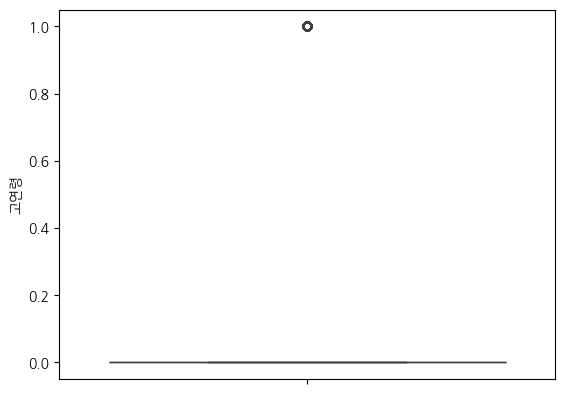

In [30]:
sns.boxplot(data['고연령'])

In [31]:
data2 = data.copy()

In [32]:


data = data.drop('회원ID', axis=1)
data

,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [33]:
data['합산요금'].apply(lambda x: x.strip().replace("", "0"))

0           02090.08050
1         010808090.050
2         0100080.01050
3       010804000.07050
4         0105010.06050
             ...       
7038      010909000.050
7039      070306020.090
7040      0304060.04050
7041        0300060.060
7042      060804040.050
Name: 합산요금, Length: 7043, dtype: object

In [34]:
data['합산요금'] = data['합산요금'].replace(" ", "0").replace("", "0").astype('float')

In [35]:


data['합산요금'].dtype

dtype('float64')

In [36]:
num_cols = data[['가입기간', '월요금', '합산요금']]
cat_cols = data.drop(['가입기간', '월요금', '합산요금'], axis=1)

In [38]:


num_cols.columns

Index(['가입기간', '월요금', '합산요금'], dtype='object')

In [39]:
cat_cols.columns

Index(['성별', '고연령', '배우자', '피부양자', '전화서비스', '2회선이상', '인터넷서비스', '온라인보안',
       '온라인백업', '기기보호서비스', '기술지원', '스트리밍TV', '스트리밍Movies', '약정옵션', '온라인고지서',
       '지불수단', '이탈여부'],
      dtype='object')

In [40]:


from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()
ss_cols = ss.fit_transform(num_cols)
ss_cols = pd.DataFrame(ss_cols, columns=num_cols.columns, index=num_cols.index)
ss_cols


,가입기간,월요금,합산요금
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [42]:


ss_data = pd.concat([cat_cols,ss_cols], axis=1)
ss_data


,성별,고연령,배우자,피부양자,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,이탈여부,가입기간,월요금,합산요금
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-1.277445,-1.160323,-0.992611
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0.066327,-0.259629,-0.172165
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.236724,-0.362660,-0.958066
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0.514251,-0.746535,-0.193672
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-1.236724,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,-0.340876,0.665992,-0.127605
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,1.613701,1.277533,2.242606
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,-0.870241,-1.168632,-0.852932
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.155283,0.320338,-0.870513


In [43]:
ss_data = pd.get_dummies(ss_data, drop_first=True)

K-means로 군집분석하기

In [44]:


from sklearn.cluster import KMeans

In [ ]:


km = KMeans(random_state=42)
km.fit(ss_data)
result = km.labels_
result


In [ ]:


data2['cluster'] = result

In [ ]:
data2


In [ ]:
data2['cluster'].value_counts()

In [ ]:
data2[data2['cluster'] == 0]['월요금'].describe()

In [ ]:


data2[data2['cluster'] == 1]['월요금'].describe()

In [ ]:


km = KMeans(n_clusters=3, random_state=42)
km.fit(ss_data)
result = km.labels_
data2['cluster'] = result


In [ ]:
data2[data2['cluster'] == 0]['월요금'].describe()

In [ ]:


data2[data2['cluster'] == 1]['월요금'].describe()

# 군집의 최적 개수 정하기
* elbow method
* 실루엣 지수

* 군집분석의 응집도 (요소들이 얼마나 모여있는지 판단하는 자료)
    * inertia_ 값이 작을 수록 군집이 잘 형성됨
* elbow method: inertia_(응집도)를 출력하고 시각화한 뒤 응집도의 감소폭이 급격한 변화가 시작되는 최적 군집의 수로 채택하는 방법

In [ ]:
print(km.inertia_)

In [ ]:
inertia = []
for i in range(1, 21):
    km = KMeans(n_cluster=i, random_state=42)
    km.fit(ss_data)
    result = inertia.append(km.inertia_)

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 21), y=inertia, marker='o', markersize = 10, markerfacecolor='red')
plt.show()

* 실루엣 지수를 출력해서 최적 군집 개수 구하기
* 실루엣 지수를 구하기 위해서는 최소 2개 이상의 군집이 필요
* 실루엣 점수가 가장 높은 클러스터 개수가 최적 군집 개수 (1에 가까울 수록 좋음)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_scores = []
for i in range(2, 21):
    km2 = KMeans(n_cluster=i, random_state=42)
    km2.fit(ss_data)
    labels = km2.labels_
    sil_scores.append(silhouette_score(ss_data, labels))
sil_scores

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(2, 21), y=sil_scores, marker='o', markersize = 10, markerfacecolor='red')
plt.show()